## **1. Definição do Problema**

Diante do cenário de crescente sofisticação dos ataques de phishing e da necessidade de mecanismos automáticos e precisos de detecção, torna-se essencial direcionar a investigação para questões que auxiliem na definição da viabilidade e eficiência das soluções propostas. Assim, este estudo é guiado por três perguntas centrais:

- É possível prever com precisão se uma página é phishing ou legítima com base nas características extraídas?

- Quais são as principais características que diferenciam uma página phishing de uma legítima?

- Como é o desempenho do modelo de classificação entre os algoritmos de machine learning Random Forest, Árvore de Decisão e Regressão Linear?


## **2. Coleta e Compreensão dos Dados**

In [ ]:
# Carregando todas as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


### 2.1 Carregando o Dataset

In [ ]:
df = pd.read_csv("/content/Phishing_Legitimate_full.csv")

In [ ]:
# Visualizando as primeiras linhas
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


### 2.3 Dicionário das Variáveis

In [ ]:
# Gerando um dicionário básico do dataset (nomes das colunas e tipos de dados)

data_dict = pd.DataFrame({
    'Variável': df.columns,
    'Tipo de Dado': df.dtypes
})
display(data_dict)

,Variável,Tipo de Dado
id,id,int64
NumDots,NumDots,int64
SubdomainLevel,SubdomainLevel,int64
PathLevel,PathLevel,int64
UrlLength,UrlLength,int64
NumDash,NumDash,int64
NumDashInHostname,NumDashInHostname,int64
AtSymbol,AtSymbol,int64
TildeSymbol,TildeSymbol,int64
NumUnderscore,NumUnderscore,int64


### 2.4 Entedimento Inicial
**Objetivos:**

**a)** Avaliar possíveis inconsistências, presenças de valores ausentes, outliers ou erros

**b)** Identificar possíveis correlações preliminares entre as variáveis

**c)** Explorar estatísticas descritivas: média, mediana, variância, distribuição de frequência

In [ ]:
# a) Entendimento inicial dos dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [ ]:
# a) Verificando a quantidade de valores ausentes por coluna

df.isnull().sum()

,0
id,0
NumDots,0
SubdomainLevel,0
PathLevel,0
UrlLength,0
NumDash,0
NumDashInHostname,0
AtSymbol,0
TildeSymbol,0
NumUnderscore,0


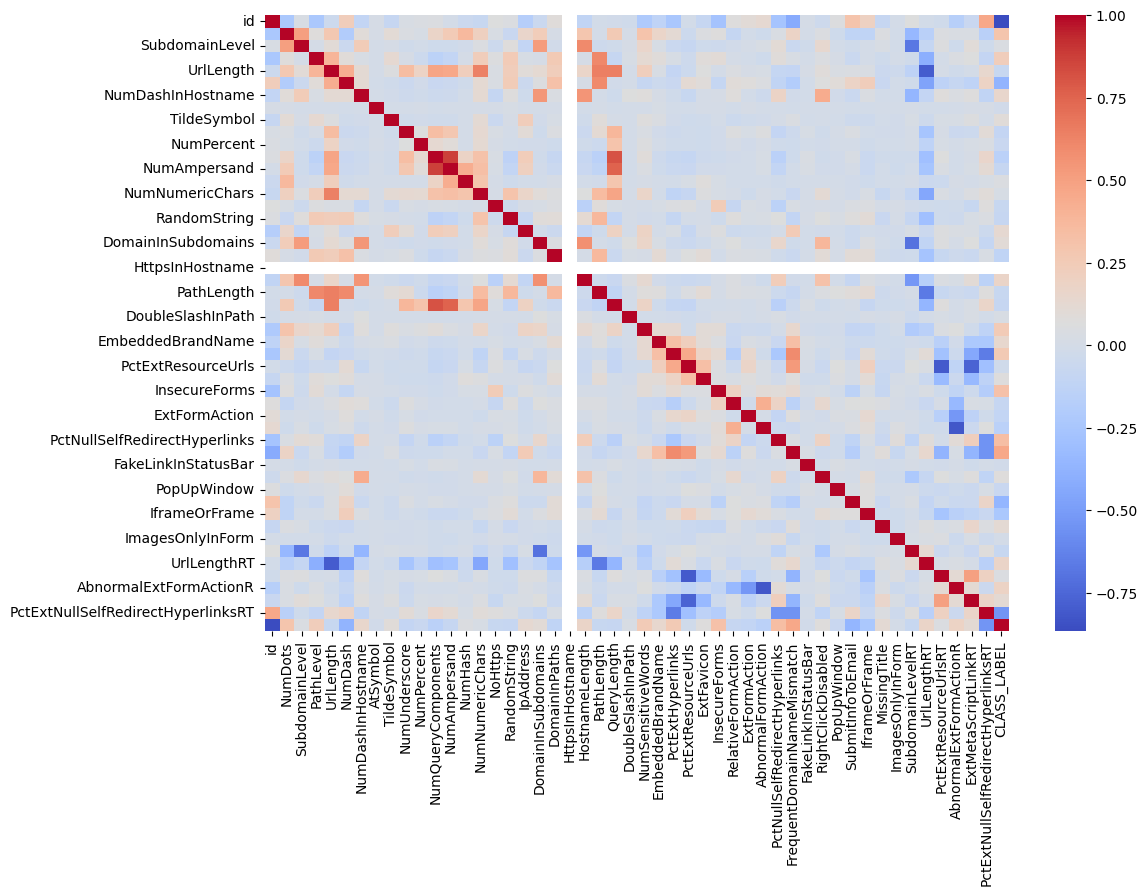

In [ ]:
# b) Matriz de correlação
corr = df.corr()

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.show()

In [ ]:
# c) Obtendo as estatísticas básicas (média, mediana, desvio padrão etc)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,5000.500000,2886.895680,1.0,2500.750000,5000.500000,7500.250000,10000.0
NumDots,10000.0,2.445100,1.346836,1.0,2.000000,2.000000,3.000000,21.0
SubdomainLevel,10000.0,0.586800,0.751214,0.0,0.000000,1.000000,1.000000,14.0
PathLevel,10000.0,3.300300,1.863241,0.0,2.000000,3.000000,4.000000,18.0
UrlLength,10000.0,70.264100,33.369877,12.0,48.000000,62.000000,84.000000,253.0
NumDash,10000.0,1.818000,3.106258,0.0,0.000000,0.000000,2.000000,55.0
NumDashInHostname,10000.0,0.138900,0.545744,0.0,0.000000,0.000000,0.000000,9.0
AtSymbol,10000.0,0.000300,0.017319,0.0,0.000000,0.000000,0.000000,1.0
TildeSymbol,10000.0,0.013100,0.113709,0.0,0.000000,0.000000,0.000000,1.0
NumUnderscore,10000.0,0.323200,1.114660,0.0,0.000000,0.000000,0.000000,18.0


## **3. Pré-processamento e Limpeza dos Dados**

### 3.1 Tratamento de valores ausentes

In [ ]:
df.isnull().sum()

,0
id,0
NumDots,0
SubdomainLevel,0
PathLevel,0
UrlLength,0
NumDash,0
NumDashInHostname,0
AtSymbol,0
TildeSymbol,0
NumUnderscore,0


In [ ]:
# Removendo a coluna 'id'

df2 = df.copy()
if "id" in df2.columns:
  df2 = df2.drop(columns=["id"])

### 3.2 Tratamento de outliers

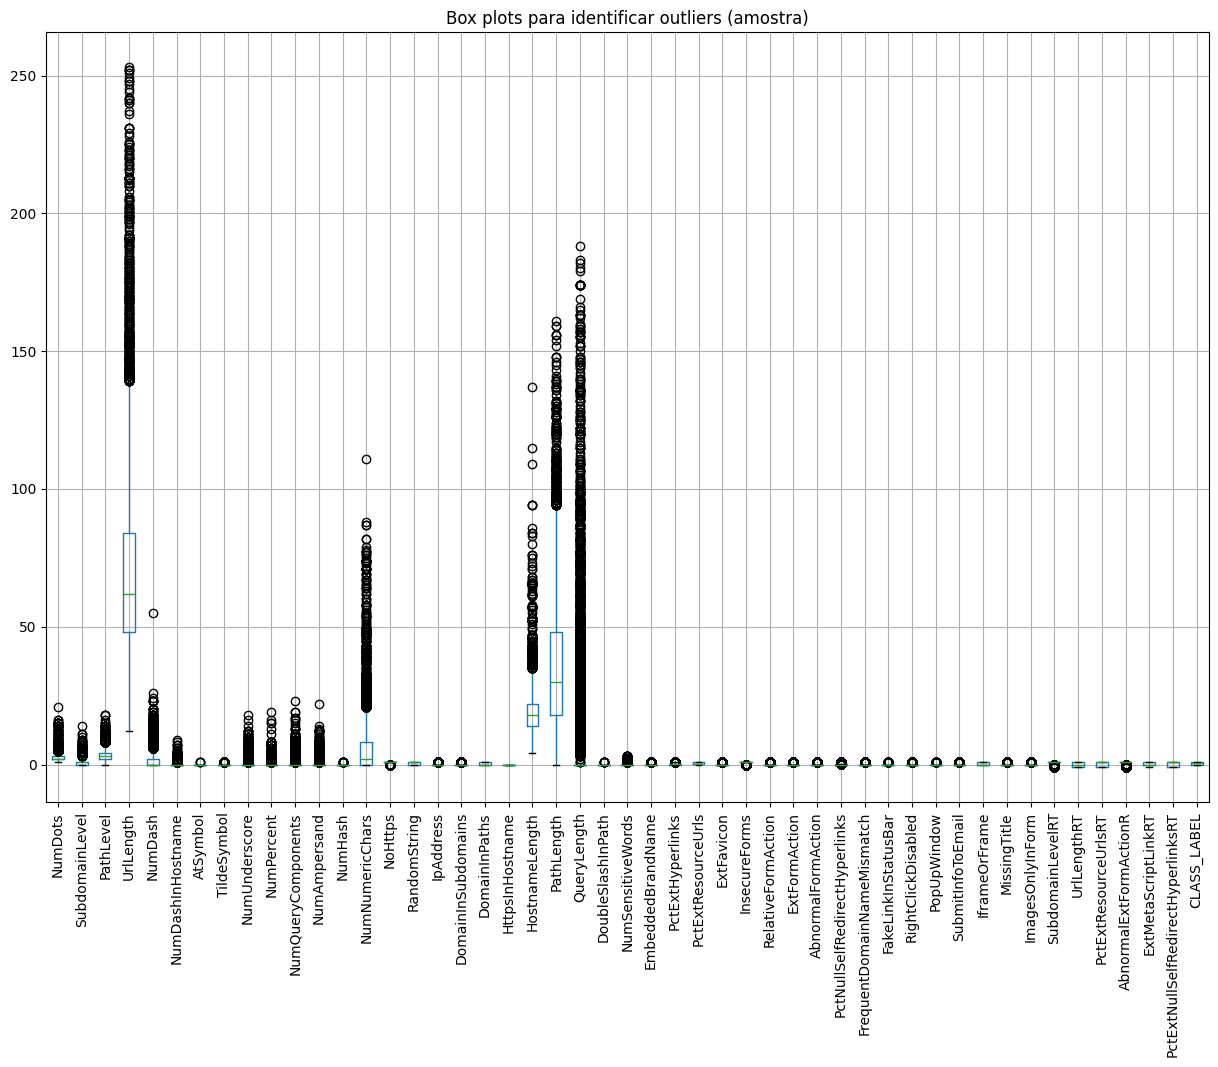

In [ ]:
# Identificando variáveis com outliers usando box plots
numerical_cols = df2.select_dtypes(include=np.number).columns
# Selecionando um subconjunto de colunas para visualização
cols_to_plot = numerical_cols[:50]

plt.figure(figsize=(15, 10))
df[cols_to_plot].boxplot()
plt.title('Box plots para identificar outliers (amostra)')
plt.xticks(rotation=90)
plt.show()

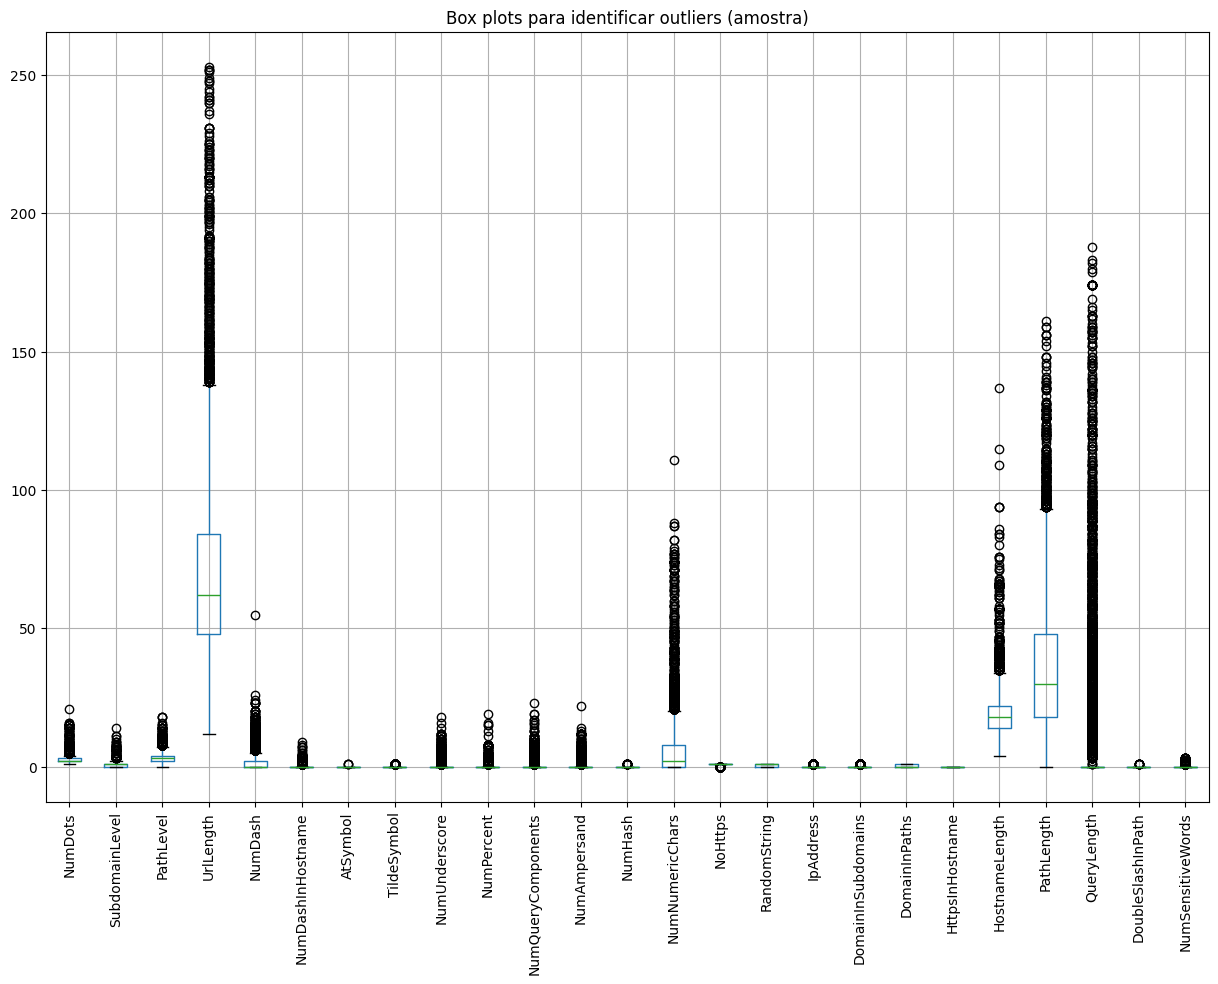

In [ ]:
# Identificando variáveis com outliers usando box plots
numerical_cols = df2.select_dtypes(include=np.number).columns
# Selecionando um subconjunto de colunas para visualização
cols_to_plot = numerical_cols[:25]

plt.figure(figsize=(15, 10))
df[cols_to_plot].boxplot()
plt.title('Box plots para identificar outliers (amostra)')
plt.xticks(rotation=90)
plt.show()

### 3.3 Correção de inconsistências

A análise exploratória das medidas estatísticas descritivas e os box plots indicaram outliers, um resultado já esperado em vista de que que os outliers presentes no dataset têm relevância na identificação de URLs de phishing.

Por esse motivo, optou-se por não realizar o tratamento ou a remoção desses valores extremos, considerando que tais observações podem representar padrões atípicos característicos de URLs maliciosas e, portanto, são potencialmente úteis para o desempenho do modelo.


### 3.4 Transformação e padronização de variáveis

A maior parte dos atributos já se encontra em formato numérico, tornando a normalização ou padronização desnecessária para modelos baseados em árvores de decisão, como a Random Forest, que não são sensíveis à escala das variáveis (Breiman, 2001; Géron, 2019). Esses modelos — Árvore de Decisão e Random Forest — utilizam partições sucessivas do espaço de atributos, não dependendo da escala das variáveis para definir seus pontos de divisão.
Entretanto, a padronização de variáveis foi realizada devido ao algoritmo de Regressão Logística, que é sensível à magnitude das variáveis. Isto poderá ser visto na Seção 4.4


### 3.5 Redução de dimensionalidade

 O conjunto de dados apresenta menos de 100 variáveis, o que não o caracteriza como um problema de alta dimensionalidade. Nessas condições, o uso do PCA apenas para reduzir dimensionalidade não se justifica, pois o custo computacional do treinamento é baixo e os riscos de sobreajuste associados a um grande número de atributos são reduzidos (WIKIPEDIA, 2025)

## **4. Seleção e Modelagem com Algoritmos de Mineração de Dados**

### 4.1 Definição do tipo de problema

O dataset utilizado contém exemplos de sites classificados como phishing e legítimos. Nesse caso, a variável alvo é a coluna `CLASS_LABEL`, que assume o valor 0 quando o site é legítimo e 1 quando é phishing.

Portanto, trata-se de um problema de classificação binária, já que a variável de saída possui apenas duas categorias possíveis: legítimo (0) ou phishing (1).

### 4.2 Escolha dos algoritmos

- Regressão Logística
- Decision Tree
- Random Forest

### 4.3 Configuração dos Parâmetros

In [ ]:
models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000),
                            {"C": [0.01, 0.1, 1, 10]}),

    "Decision Tree": (DecisionTreeClassifier(random_state=42),
                      {"max_depth": [5, 10, 20, None], "criterion": ["gini", "entropy"]}),

    "Random Forest": (RandomForestClassifier(random_state=42),
                      {"n_estimators": [50, 100, 200], "max_depth": [10, 20, None]})
}

### 4.4 Construção e treinamento dos modelos

In [ ]:
# Separar features e target (supondo que a última coluna seja a classe)
X = df2.drop(columns=['CLASS_LABEL'])  # ajuste se o nome da coluna alvo for diferente
y = df2['CLASS_LABEL']

# Divisão treino/teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalonamento (necessário para regressão logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =======================================================
# Treinamento e avaliação
# =======================================================
results = {}

for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv=5, scoring='f1', n_jobs=-1)

    if name == "Logistic Regression":
        grid.fit(X_train_scaled, y_train)
        y_pred = grid.predict(X_test_scaled)
    else:
        grid.fit(X_train, y_train)
        y_pred = grid.predict(X_test)

    results[name] = {
        "Best Params": grid.best_params_,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }

# Mostrar resultados
pd.DataFrame(results).T

,Best Params,Accuracy,Precision,Recall,F1-Score
Logistic Regression,{'C': 10},0.953,0.946159,0.960667,0.953358
Decision Tree,"{'criterion': 'entropy', 'max_depth': 10}",0.961333,0.951697,0.972,0.961741
Random Forest,"{'max_depth': 20, 'n_estimators': 200}",0.986,0.985353,0.986667,0.986009


### 4.5 Importância das Variáveis

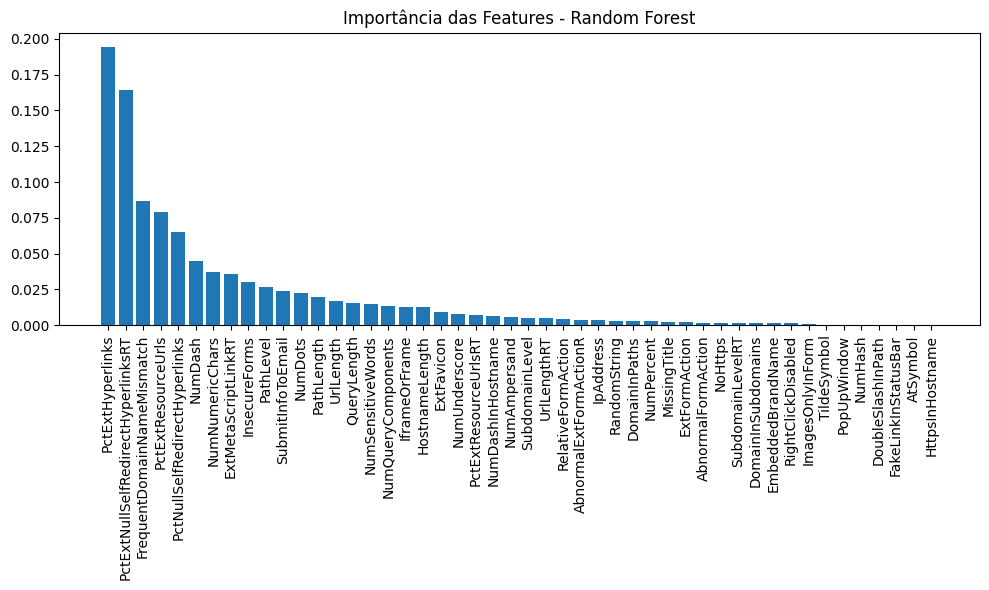

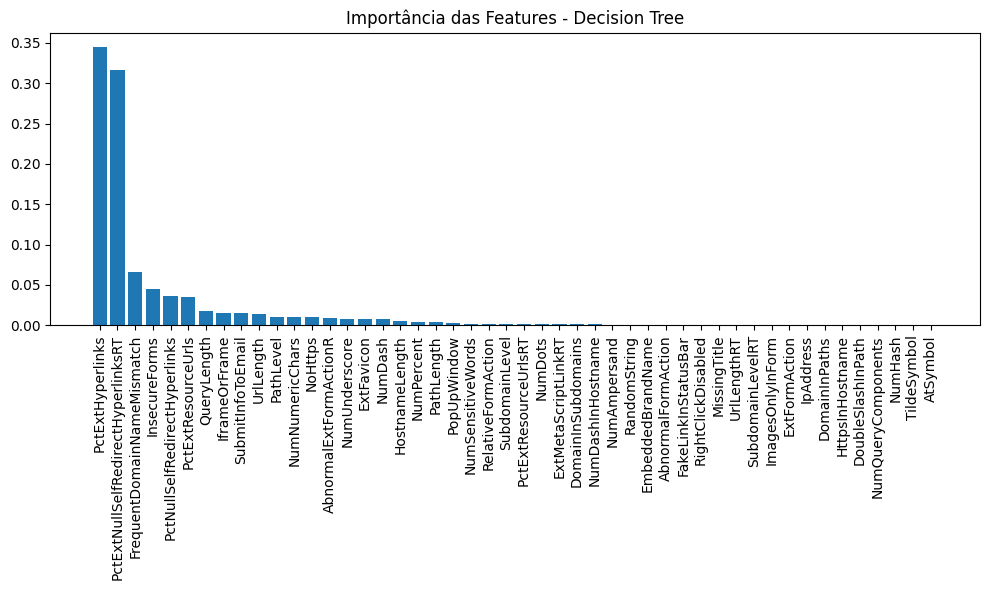

Top 10 variáveis mais importantes (Regressão Logística):
FrequentDomainNameMismatch    2.085607
InsecureForms                 1.730209
IpAddress                     1.553819
NumAmpersand                  1.243093
NumDots                       0.815172
ExtFavicon                    0.810556
QueryLength                   0.803074
NumSensitiveWords             0.783911
PathLevel                     0.655040
NumDashInHostname             0.643118
dtype: float64

Top 10 variáveis menos importantes (Regressão Logística):
IframeOrFrame                        -0.670130
NumPercent                           -0.700098
SubdomainLevel                       -0.844948
PctExtResourceUrls                   -0.977195
SubmitInfoToEmail                    -1.225253
PctNullSelfRedirectHyperlinks        -1.538298
NumDash                              -1.621399
NumQueryComponents                   -2.609537
PctExtHyperlinks                     -2.613798
PctExtNullSelfRedirectHyperlinksRT   -3.853665
dtype: fl

In [ ]:
# ===== Random Forest Feature Importance =====
best_rf = RandomForestClassifier(**results["Random Forest"]["Best Params"], random_state=42)
best_rf.fit(X_train, y_train)

importances_rf = best_rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(10,6))
plt.title("Importância das Features - Random Forest")
plt.bar(range(X.shape[1]), importances_rf[indices_rf], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices_rf], rotation=90)
plt.tight_layout()
plt.show()

# ===== Decision Tree Feature Importance =====
best_dt = DecisionTreeClassifier(**results["Decision Tree"]["Best Params"], random_state=42)
best_dt.fit(X_train, y_train)

importances_dt = best_dt.feature_importances_
indices_dt = np.argsort(importances_dt)[::-1]

plt.figure(figsize=(10,6))
plt.title("Importância das Features - Decision Tree")
plt.bar(range(X.shape[1]), importances_dt[indices_dt], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices_dt], rotation=90)
plt.tight_layout()
plt.show()

# ===== Logistic Regression Coefficients =====
best_lr = LogisticRegression(**results["Logistic Regression"]["Best Params"], max_iter=1000)
best_lr.fit(X_train_scaled, y_train)

coefs = best_lr.coef_[0]
coef_importance = pd.Series(coefs, index=X.columns).sort_values(ascending=False)

print("Top 10 variáveis mais importantes (Regressão Logística):")
print(coef_importance.head(10))
print("\nTop 10 variáveis menos importantes (Regressão Logística):")
print(coef_importance.tail(10))

O código acima identifica apenas quais variáveis são mais relevantes, ou seja, ele não muda o desempenho dos modelos. Por conta disso, com o objetivo de avaliar como o desempenho dos modelos varia ao utilizar apenas as Top N features mais relevantes, em vez de todas as variáveis, foi executado o código a seguir.

In [ ]:
# =========================================
# Comparação de desempenho com Top N features
# =========================================
top_n_list = [5, 10, 15, 20, 25, 30, 35, 40, 45, 49]
results_features = {}

# Importâncias das variáveis via Random Forest
best_rf = RandomForestClassifier(**results["Random Forest"]["Best Params"], random_state=42)
best_rf.fit(X_train, y_train)
importances_rf = best_rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

for n in top_n_list:
    top_features = X.columns[indices_rf][:n]

    # Reduz X_train e X_test
    X_train_top = X_train[top_features]
    X_test_top = X_test[top_features]

    results_top = {}

    for name, (model, params) in models.items():
        grid = GridSearchCV(model, params, cv=5, scoring="f1", n_jobs=-1)

        if name == "Logistic Regression":
            # Escalonar apenas as top features
            scaler = StandardScaler()
            X_train_scaled_top = scaler.fit_transform(X_train_top)
            X_test_scaled_top = scaler.transform(X_test_top)

            grid.fit(X_train_scaled_top, y_train)
            y_pred = grid.predict(X_test_scaled_top)
            y_proba = grid.predict_proba(X_test_scaled_top)[:, 1]
        else:
            grid.fit(X_train_top, y_train)
            y_pred = grid.predict(X_test_top)
            y_proba = grid.predict_proba(X_test_top)[:, 1]

        results_top[name] = {
            "Best Params": grid.best_params_,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1-Score": f1_score(y_test, y_pred),
        }

    # Salva resultados para esse N
    results_features[f"Top {n}"] = pd.DataFrame(results_top).T

# =========================================
# Mostrar comparações
# =========================================
for key, df_res in results_features.items():
    print(f"\n====== Resultados com {key} features ======")
    display(df_res)



====== Resultados com Top 5 features ======


,Best Params,Accuracy,Precision,Recall,F1-Score
Logistic Regression,{'C': 1},0.883667,0.885466,0.881333,0.883395
Decision Tree,"{'criterion': 'entropy', 'max_depth': None}",0.96,0.941741,0.980667,0.96081
Random Forest,"{'max_depth': None, 'n_estimators': 50}",0.963,0.947199,0.980667,0.963642



====== Resultados com Top 10 features ======


,Best Params,Accuracy,Precision,Recall,F1-Score
Logistic Regression,{'C': 10},0.914333,0.908613,0.921333,0.914929
Decision Tree,"{'criterion': 'entropy', 'max_depth': 20}",0.964333,0.963407,0.965333,0.964369
Random Forest,"{'max_depth': None, 'n_estimators': 100}",0.976667,0.974768,0.978667,0.976713



====== Resultados com Top 15 features ======


,Best Params,Accuracy,Precision,Recall,F1-Score
Logistic Regression,{'C': 10},0.922333,0.918705,0.926667,0.922668
Decision Tree,"{'criterion': 'gini', 'max_depth': 10}",0.966333,0.964167,0.968667,0.966412
Random Forest,"{'max_depth': 20, 'n_estimators': 200}",0.98,0.978088,0.982,0.98004



====== Resultados com Top 20 features ======


,Best Params,Accuracy,Precision,Recall,F1-Score
Logistic Regression,{'C': 10},0.940333,0.932547,0.949333,0.940866
Decision Tree,"{'criterion': 'gini', 'max_depth': 10}",0.969333,0.962549,0.976667,0.969557
Random Forest,"{'max_depth': 20, 'n_estimators': 100}",0.982,0.981358,0.982667,0.982012



====== Resultados com Top 25 features ======


,Best Params,Accuracy,Precision,Recall,F1-Score
Logistic Regression,{'C': 1},0.944333,0.939354,0.95,0.944647
Decision Tree,"{'criterion': 'gini', 'max_depth': 10}",0.970333,0.965677,0.975333,0.970481
Random Forest,"{'max_depth': None, 'n_estimators': 100}",0.984667,0.984021,0.985333,0.984677



====== Resultados com Top 30 features ======


,Best Params,Accuracy,Precision,Recall,F1-Score
Logistic Regression,{'C': 10},0.945,0.938856,0.952,0.945382
Decision Tree,"{'criterion': 'entropy', 'max_depth': 20}",0.964667,0.956152,0.974,0.964993
Random Forest,"{'max_depth': None, 'n_estimators': 50}",0.982333,0.9833,0.981333,0.982316



====== Resultados com Top 35 features ======


,Best Params,Accuracy,Precision,Recall,F1-Score
Logistic Regression,{'C': 10},0.950333,0.945287,0.956,0.950613
Decision Tree,"{'criterion': 'entropy', 'max_depth': 20}",0.964333,0.956721,0.972667,0.964628
Random Forest,"{'max_depth': 20, 'n_estimators': 200}",0.984333,0.984011,0.984667,0.984339



====== Resultados com Top 40 features ======


,Best Params,Accuracy,Precision,Recall,F1-Score
Logistic Regression,{'C': 10},0.951,0.944189,0.958667,0.951373
Decision Tree,"{'criterion': 'entropy', 'max_depth': 10}",0.962,0.953534,0.971333,0.962351
Random Forest,"{'max_depth': None, 'n_estimators': 200}",0.985667,0.985991,0.985333,0.985662



====== Resultados com Top 45 features ======


,Best Params,Accuracy,Precision,Recall,F1-Score
Logistic Regression,{'C': 10},0.952667,0.944954,0.961333,0.953073
Decision Tree,"{'criterion': 'entropy', 'max_depth': 20}",0.967667,0.96,0.976,0.967934
Random Forest,"{'max_depth': 20, 'n_estimators': 100}",0.985,0.984677,0.985333,0.985005



====== Resultados com Top 49 features ======


,Best Params,Accuracy,Precision,Recall,F1-Score
Logistic Regression,{'C': 10},0.953,0.946159,0.960667,0.953358
Decision Tree,"{'criterion': 'entropy', 'max_depth': 20}",0.965333,0.956806,0.974667,0.965654
Random Forest,"{'max_depth': 20, 'n_estimators': 200}",0.985,0.985972,0.984,0.984985


## **5. Interpretação e Avaliação dos Resultados**

### 5.1 Validação do Modelo

A Random Forest apresentou o melhor desempenho global, com Acurácia de 98,0%, Precisão de 97,8%, Recall de 98,2% e F1-Score de 98,0%, atendendo integralmente a todos os critérios de sucesso. A robustez do ensemble garante baixa propensão ao overfitting, permitindo capturar padrões complexos nos dados sem comprometer a capacidade de generalização.

A Árvore de Decisão (Decision Tree) também cumpriu satisfatoriamente as metas, com Acurácia de 96,6% e F1-Score de 96,6%, sendo ligeiramente inferior à Random Forest. O risco de overfitting é moderado, mas controlado pela limitação da profundidade máxima das árvores (max_depth=10), garantindo estabilidade nos resultados em dados de teste.

De forma geral, os resultados indicam que os modelos baseados em árvore, especialmente a Random Forest, apresentam melhor equilíbrio entre precisão, sensibilidade (recall) e capacidade preditiva, enquanto o modelo linear requer maior número de features ou ajustes de regularização para melhorar seu desempenho. A escolha de 15 variáveis representa a busca do equilíbrio entre a redução de dimensionalidade e manutenção da performance, garantindo interpretação sem perda significativa de acurácia.


### 5.2 Análise dos Erros e Métricas

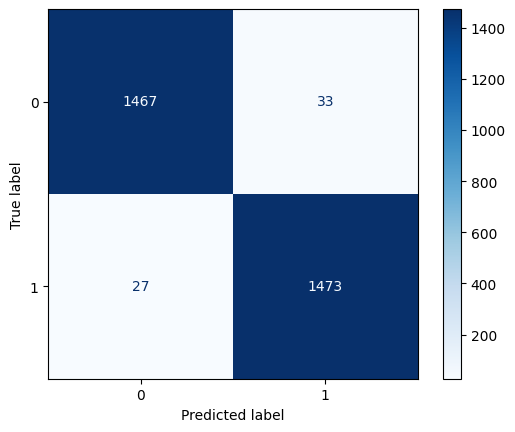

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Seleciona Top 15 features
n = 15
top_features = X.columns[indices_rf][:n]

X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Treina Random Forest com os melhores parâmetros encontrados antes
best_rf = RandomForestClassifier(**results["Random Forest"]["Best Params"], random_state=42)
best_rf.fit(X_train_top, y_train)

# Faz previsões
y_pred = best_rf.predict(X_test_top)

# Gera matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibe
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap="Blues", values_format="d")

### 5.3 Interpretando as variáveis mais importantes

- `PctExtNullSelfRedirectHyperlinksRT` e `PctExtHyperlinks` → alta proporção de hyperlinks/redirecionamentos externos, típica de páginas maliciosas.

- `FrequentDomainNameMismatch` → discrepâncias entre o domínio principal e outros elementos da página, indício de falsificação.

- `PctExtResourceUrls` → grande uso de recursos externos (visuais/funcionais) não hospedados no próprio domínio.

- `NumNumericChars` e `UrlLength` → URLs longas e com muitos caracteres numéricos, usadas para confundir usuários.

- `InsecureForms` → presença de formulários inseguros mesmo em ambientes HTTPS.

- `ExtFavicon` → favicon carregado de domínios externos, comportamento incomum em sites legítimos.

- `PathLevel` e `NumDots` → profundidade de caminho e número de pontos na URL, explorados para ocultar a origem real.

### 5.1 Validação do modelo

**Objetivos:**

a) Verificar se o modelo atende aos critérios de sucesso definidos na etapa inicial.

b) Identificar riscos de overfitting (sobreajuste) ou underfitting (subajuste).

### 5.2 Análise de erros e métricas
**Objetivos:**

a) Confusion matrix (matriz de confusão) para classificação;

b) Verificar possíveis vieses do modelo (bias), classes desbalanceadas, etc.

In [ ]:
# b)
print("\nDistribuição da classe:")
print(df["CLASS_LABEL"].value_counts())


Distribuição da classe:
CLASS_LABEL
1    5000
0    5000
Name: count, dtype: int64


O dataset original tem uma distribuição de classes balanceada (5000 URLs legítimas e 5000 de phishing). Isso é um bom ponto de partida, pois datasets desbalanceados podem levar modelos a ter um viés em favor da classe majoritária.

Desempenho por Classe: As métricas de Precision, Recall e F1-Score são muito semelhantes e altas para ambas as classes (Legítimo - 0 e Phishing - 1), todas em torno de 0.99.

- precision para classe 0 é 0.99, e para classe 1 é 0.99.

- recall para classe 0 é 0.99, e para classe 1 é 0.99.

- f1-score para classe 0 é 0.99, e para classe 1 é 0.99.

**Erros por Classe:** O número de falsos positivos (22) e falsos negativos (20) é muito próximo. Isso sugere que o modelo não está cometendo significativamente mais erros em uma classe do que na outra.
Conclusão sobre Vieses:

Com base na análise das métricas por classe e na distribuição dos erros na matriz de confusão, não há evidências fortes de viés significativo do modelo em relação a uma das classes. O modelo Random Forest parece ser igualmente eficaz na identificação de URLs legítimas e de phishing.

A alta e equilibrada performance em ambas as classes, juntamente com o dataset balanceado, sugere que o modelo não está favorecendo indevidamente uma classe em detrimento da outra.

## **6. Implantação e Monitoramento (Planejamento)**

### 6.1 Planejamento de implantação

Considerando que este projeto resultou em um modelo de classificação binária com alta precisão na identificação de URLs de phishing, sua aplicação prática poderia ocorrer de diversas formas, dependendo do contexto e da infraestrutura disponível:

*   **API (Interface de Programação de Aplicações):** O modelo treinado poderia ser empacotado como um serviço web (API). Outras aplicações (navegadores, clientes de e-mail, sistemas de segurança de rede) poderiam enviar URLs para essa API, que retornaria a classificação (legítima ou phishing) em tempo real. Esta é uma abordagem comum para integrar modelos de machine learning em sistemas existentes.

*   **Dashboard ou Relatório Interativo:** Os resultados da classificação poderiam ser apresentados em um dashboard ou relatório interativo. Isso seria útil para equipes de segurança monitorarem tendências de phishing, analisarem padrões em URLs maliciosas e visualizarem a performance do modelo ao longo do tempo. Seria possível criar visualizações da distribuição de URLs classificadas, os tipos de features mais comuns em URLs de phishing detectadas, etc. **É crucial que estas visualizações sejam intuitivas e compreensíveis para públicos não técnicos**, permitindo que gestores e outros stakeholders entendam rapidamente o desempenho do modelo e as principais características de URLs suspeitas sem a necessidade de conhecimento aprofundado em ciência de dados.

*   **Extensão de Navegador:** Uma aplicação mais direta para usuários finais seria uma extensão de navegador que utiliza o modelo (ou uma versão otimizada dele) para verificar URLs visitadas em tempo real e alertar o usuário sobre possíveis sites de phishing.

*   **Integração em Sistemas de Segurança:** O modelo poderia ser integrado a sistemas de segurança de rede existentes, como firewalls, proxies ou sistemas de detecção de intrusão, para adicionar uma camada de detecção de phishing baseada nas características das URLs.

**Uso dos Resultados na Realidade (Caso a implantação direta não seja imediata):**

Mesmo que uma implantação em tempo real não seja o próximo passo imediato, os resultados e insights obtidos neste projeto já são valiosos:

*   **Educação e Conscientização:** As características identificadas como mais importantes para distinguir phishing (como `FrequentDomainNameMismatch`, `InsecureForms`, `UrlLength`, `NumSensitiveWords`) podem ser usadas para educar usuários sobre como identificar URLs suspeitas.
*   **Desenvolvimento de Regras:** Os insights sobre as features relevantes podem ajudar na criação ou aprimoramento de regras heurísticas em sistemas de detecção de phishing baseados em regras.
*   **Análise Forense:** Em investigações de segurança, as features destacadas podem guiar a análise de URLs suspeitas para determinar se são maliciosas.
*   **Aprimoramento de Ferramentas Existentes:** Os resultados podem informar o desenvolvimento de novas ferramentas ou a melhoria das existentes para extrair e analisar as características de URLs de forma mais eficaz.

Este planejamento inicial considera diferentes níveis de complexidade de implantação e demonstra o valor prático dos resultados do projeto.

### 4.3 Configuração dos Parâmetros

Para otimizar o desempenho dos modelos de classificação selecionados, foi empregada a técnica de busca em grade com validação cruzada (GridSearchCV com validação cruzada k-fold, onde k=5). Este método permite explorar sistematicamente diferentes combinações de hiperparâmetros para cada algoritmo e selecionar o conjunto que maximiza uma métrica de avaliação definida (neste caso, o F1-Score).

Os hiperparâmetros ajustados para cada modelo foram:

*   **Regressão Logística (LogisticRegression):**
    *   **Hiperparâmetro:** `C` (inverso da força de regularização). Este parâmetro controla a penalidade aplicada aos coeficientes do modelo para evitar overfitting. Valores menores de `C` indicam uma regularização mais forte (modelo mais simples), enquanto valores maiores indicam regularização mais fraca (modelo mais flexível).
    *   **Grid de busca:** `[0.01, 0.1, 1, 10]`. Esta faixa logarítmica foi escolhida para cobrir um espectro desde forte regularização (0.01) até regularização mínima (10), permitindo identificar o ponto ótimo de complexidade do modelo.

*   **Árvore de Decisão (DecisionTreeClassifier):**
    *   **Hiperparâmetros:** `max_depth` e `criterion`.
    *   `max_depth`: Define a profundidade máxima da árvore. Uma profundidade muito baixa pode levar a *underfitting* (modelo excessivamente simples), enquanto uma profundidade muito alta (*None* indica sem limite) pode resultar em *overfitting* (modelo que memoriza os dados de treino).
    *   `criterion`: Especifica a função para medir a qualidade de uma divisão. Foram avaliados os critérios 'gini' (impureza Gini) e 'entropy' (ganho de informação).
    *   **Grid de busca:** `max_depth = [5, 10, 20, None]` e `criterion = ["gini", "entropy"]`. Esta combinação permite explorar árvores com diferentes níveis de complexidade e comparar o impacto dos critérios de divisão.

*   **Random Forest (RandomForestClassifier):**
    *   **Hiperparâmetros:** `n_estimators` e `max_depth`.
    *   `n_estimators`: Número de árvores no conjunto. Um número maior de árvores geralmente melhora o desempenho e a estabilidade, mas aumenta o tempo computacional.
    *   `max_depth`: Similar ao da Árvore de Decisão individual, controla a profundidade máxima das árvores constituintes.
    *   **Grid de busca:** `n_estimators = [50, 100, 200]` e `max_depth = [10, 20, None]`. Estes valores foram selecionados como representativos para balancear o desempenho preditivo com a eficiência computacional.

A utilização de validação cruzada (cv=5) no `GridSearchCV` garante que a avaliação de cada combinação de hiperparâmetros seja robusta, reduzindo a dependência da divisão específica entre treino e validação e fornecendo uma estimativa mais confiável do desempenho do modelo em dados não vistos.